In [85]:
import matplotlib.pyplot as plt
import numpy as np
from tkinter import Tk
from tkinter import filedialog as fd
import os
from scipy.optimize import curve_fit
from scipy.optimize import brute
from scipy import asarray as ar,exp
import math

In [14]:
#return a bool indicating if a string can be represented numerically
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [56]:
def exponential(x, energy, mu_0):
    return mu_0*np.subtract(1, exp(-energy/x))

[  8.617  17.234  25.851]
[  8.617  17.234  25.851]
[  8.617  17.234  25.851]


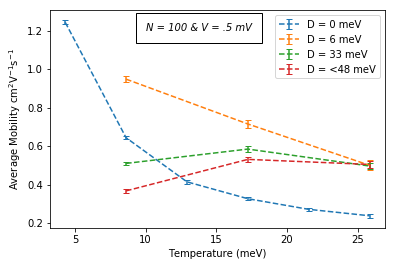

In [88]:
k = 8.617e-2

root = Tk()
folder_selected = fd.askdirectory(title = "Choose the folder containing the results")
#f = open(filename,'r')
root.withdraw()

results = []
temperature = []
for file in os.listdir(folder_selected):
    if file[-4:] == '.txt':
        f = open(folder_selected + '/' + file)
        results.append([])
        #splitFileName = file.split("_",2)
        temperature.append(float(file.split("_",3)[3].split("K")[0]))

        for line in f:
            lineContents = line.split()
            if is_number(lineContents[1]):
                mobility = float(lineContents[1])
                results[-1].append(mobility)
        
temperatureArray = k*np.asarray(temperature)
resultsArray = np.asarray(results)
averageResults = np.mean(resultsArray,axis=1)
stdResults = np.divide(np.std(resultsArray,axis = 1),math.sqrt(50))
sort = np.argsort(temperatureArray)
plt.errorbar(temperatureArray[sort], averageResults[sort],linestyle = "--", yerr=stdResults[sort], capsize = 3.0, label = "D = 0 meV")
temp = np.arange(50,300,5)

root = Tk()
folder_selected = fd.askdirectory(title = "Choose the folder containing the other results")
root.withdraw()
for file in os.listdir(folder_selected):
    if file[-4:] == '.txt':
        f = open(folder_selected + '/' + file)
        T = []
        μ = []
        σ = []
        index = 1
        for line in f:
            if index > 1:
                newline = line.split()
                T.append(float(newline[0]))
                μ.append(float(newline[1]))
                σ.append(float(newline[2]))
            index += 1
        T_array = k*np.asarray(T)
        μ_array = np.asarray(μ)
        σ_array = np.asarray(σ)
        tag = file[-9:-4]
        print(T_array)
        if tag == "0.2nm":
            disorder = "6 meV"
        elif tag == "0.4nm":
            disorder = "33 meV"
        elif tag == "0.6nm":
            disorder = "<48 meV"
        disorderTag = "D = " + disorder
        plt.errorbar(T_array, μ_array, linestyle = "--", yerr = σ_array, capsize = 3.0, label = disorderTag)

# popt,pcov = curve_fit(exponential,temperatureArray[sort],averageResults[sort])
# energy = popt[0]
# mu_0 = popt[1]

# print("Energy of fit is: ",energy)
# print("Intercept of fit is: ",mu_0)
# plt.plot(temp,exponential(temp,*popt),color = 'red')
plt.text(10,1.2,'N = 100 & V = .5 mV',style = 'italic',fontsize = 10,bbox = {'facecolor':'white','pad':10})
plt.xlabel("Temperature (meV)")
plt.ylabel("Average Mobility cm$^2$V$^{-1}$s$^{-1}$")
plt.legend()
plt.savefig(folder_selected + '/' + 'MobilityVsT.png', format='png', dpi=1200)
plt.show()

In [34]:
filename[-4:]

'none'

In [62]:
e = 1.6e-19
kB = 1.38e-23
kb = 8.61733e-5
voltage = kB*7.0769/e
print(voltage)
print(70*kb*0.1)

0.000610382625
0.0006032131
